<a href="https://colab.research.google.com/github/VincentZuo/cs236/blob/main/Auto_Videos_Chapterization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation and downloads

In [1]:
!pip install transformers

In [2]:
!git clone https://github.com/antoyang/VidChapters.git
!chmod +x VidChapters/PDVC/data/yc2/features/download_yc2_tsn_features.sh
!./VidChapters/PDVC/data/yc2/features/download_yc2_tsn_features.sh

Cloning into 'VidChapters'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 397 (delta 81), reused 132 (delta 78), pack-reused 260
Receiving objects: 100% (397/397), 35.16 MiB | 19.05 MiB/s, done.
Resolving deltas: 100% (159/159), done.
./VidChapters/PDVC/data/yc2/features/download_yc2_tsn_features.sh: line 1: http://youcook2.eecs.umich.edu/static/dat/yc2_densecap/training_feat_yc2.tar.gz: No such file or directory
--2023-12-09 16:59:31--  http://youcook2.eecs.umich.edu/static/dat/yc2_densecap/training_feat_yc2.tar.gz
Resolving youcook2.eecs.umich.edu (youcook2.eecs.umich.edu)... 141.212.115.67
Connecting to youcook2.eecs.umich.edu (youcook2.eecs.umich.edu)|141.212.115.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9621429233 (9.0G) [application/octet-stream]
Saving to: ‘training_feat_yc2.tar.gz’

training_feat_yc2.t 100%[===================>]   8.96G  2

In [3]:
%%capture
!tar -xvzf /content/training_feat_yc2.tar.gz
!tar -xvzf /content/validation_feat_yc2.tar.gz
!tar -xvzf /content/testing_feat_yc2.tar.gz

In [4]:
!cat ./VidChapters/PDVC/data/yc2/captiondata/yc2_val.json
!ls /content/VidChapters/PDVC/data/yc2/captiondata/

{"v_xHr8X2Wpmno": {"duration": 206.86, "timestamps": [[47, 60], [67, 89], [91, 98], [99, 137], [153, 162], [163, 185]], "sentences": ["pick the ends off the verdalago", "combine lemon juice sumac garlic salt and oil in a bowl", "chop lettuce and place it in a bowl", "add verdalago pepper cucumbers tomatoes herbs and onions to the lettuce in the bowl", "pour the dressing over the salad and mix", "add the fried pita to the salad and mix"]}, "v_a5FoLWnEiAI": {"duration": 595.85, "timestamps": [[26, 36], [38, 68], [172, 192], [201, 248], [315, 325], [342, 360], [366, 403], [417, 499], [505, 508], [556, 582]], "sentences": ["soak some black lentils and red kidney beans in water", "cook them in a pot of water with lid on", "blend the lentil and red kidney beans in the pot", "heat a pan add butter oil cumin seeds coriander seeds and onion and stir", "cover with a lid and stir", "add chopped tomatoes mix it well and cover", "mix dal makhni masala red chili powder and turmeric powder in a small

In [5]:
!cat /content/youcookii_annotations_trainval.json

cat: /content/youcookii_annotations_trainval.json: No such file or directory


# PCA

In [6]:
import numpy as np
import os
from sklearn.decomposition import PCA

def get_pca(dim=16):
  # Directory containing the original data
  input_directory = "training"
  # Initialize an empty list to store data from all files
  all_data = []

  # Load and concatenate data from each file
  for filename in os.listdir(input_directory):
      if filename.endswith("bn.npy"):
          file_path = os.path.join(input_directory, filename)
          data = np.load(file_path)
          all_data.append(data)

  # Concatenate all data into a single array
  all_data = np.vstack(all_data)

  # Initialize PCA to reduce dimensions to 16
  pca = PCA(n_components=dim)

  # Fit PCA on the entire dataset
  pca.fit(all_data)
  return pca

def process_with_pca(pca, dim=16):
  input_t = "training"
  output_t = "training_" + str(dim)
  input_val = "validation"
  output_val = "validation_" + str(dim)
  input_test = "testing"
  output_test = "testing_" + str(dim)


  # Process each file individually and transform using the fitted PCA
  for src_dir, target_dir in [
      (input_t, output_t),
      (input_val, output_val),
      (input_test, output_test)]:
    # Create the output directory if it doesn't exist
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for filename in os.listdir(src_dir):
        if filename.endswith("bn.npy"):
            file_path = os.path.join(src_dir, filename)
            print(file_path)
            data = np.load(file_path)

            # Transform the data using the fitted PCA model
            transformed_data = pca.transform(data)
            print(transformed_data.shape)

            # Save the transformed data
            output_file_path = os.path.join(target_dir, filename)
            np.save(output_file_path, transformed_data)

  print("PCA transformation complete. Reduced data saved")


In [7]:
pca = get_pca(64)

In [8]:
process_with_pca(pca, 64)

training/C2cNcOXGyZA_bn.npy
(471, 64)
training/xHuaYMXGTnc_bn.npy
(368, 64)
training/01lB162koHA_bn.npy
(690, 64)
training/cxijjHcz70Q_bn.npy
(1084, 64)
training/9RRHAydI_xk_bn.npy
(898, 64)
training/WDIf2Jo9EiQ_bn.npy
(721, 64)
training/BK80fNF9ysI_bn.npy
(611, 64)
training/byBVHb9z8Kc_bn.npy
(258, 64)
training/DrM_ZiRvIro_bn.npy
(1051, 64)
training/X4T4XjWNUgc_bn.npy
(721, 64)
training/vmHAOH5UMFY_bn.npy
(194, 64)
training/usexIHfWXK8_bn.npy
(599, 64)
training/D0EAxdmzjzE_bn.npy
(489, 64)
training/TMBCzbD7430_bn.npy
(1250, 64)
training/CIRA1IC9shc_bn.npy
(759, 64)
training/QqepsJSi5fs_bn.npy
(675, 64)
training/KfAq4KRIVs4_bn.npy
(1169, 64)
training/QWhn9Ncvvso_bn.npy
(476, 64)
training/hu6iMNynOcI_bn.npy
(241, 64)
training/Rig-KeXvcyk_bn.npy
(824, 64)
training/DzRIphFQ2Jc_bn.npy
(376, 64)
training/IdEZ7LvLZPE_bn.npy
(394, 64)
training/w4oZ6CWl7no_bn.npy
(165, 64)
training/MxcI4wQLvK4_bn.npy
(627, 64)
training/0IuQKThr-pM_bn.npy
(336, 64)
training/pS5T4dCCclQ_bn.npy
(263, 64)
training

In [9]:
pca = get_pca(16)
process_with_pca(pca, 16)

training/C2cNcOXGyZA_bn.npy
(471, 16)
training/xHuaYMXGTnc_bn.npy
(368, 16)
training/01lB162koHA_bn.npy
(690, 16)
training/cxijjHcz70Q_bn.npy
(1084, 16)
training/9RRHAydI_xk_bn.npy
(898, 16)
training/WDIf2Jo9EiQ_bn.npy
(721, 16)
training/BK80fNF9ysI_bn.npy
(611, 16)
training/byBVHb9z8Kc_bn.npy
(258, 16)
training/DrM_ZiRvIro_bn.npy
(1051, 16)
training/X4T4XjWNUgc_bn.npy
(721, 16)
training/vmHAOH5UMFY_bn.npy
(194, 16)
training/usexIHfWXK8_bn.npy
(599, 16)
training/D0EAxdmzjzE_bn.npy
(489, 16)
training/TMBCzbD7430_bn.npy
(1250, 16)
training/CIRA1IC9shc_bn.npy
(759, 16)
training/QqepsJSi5fs_bn.npy
(675, 16)
training/KfAq4KRIVs4_bn.npy
(1169, 16)
training/QWhn9Ncvvso_bn.npy
(476, 16)
training/hu6iMNynOcI_bn.npy
(241, 16)
training/Rig-KeXvcyk_bn.npy
(824, 16)
training/DzRIphFQ2Jc_bn.npy
(376, 16)
training/IdEZ7LvLZPE_bn.npy
(394, 16)
training/w4oZ6CWl7no_bn.npy
(165, 16)
training/MxcI4wQLvK4_bn.npy
(627, 16)
training/0IuQKThr-pM_bn.npy
(336, 16)
training/pS5T4dCCclQ_bn.npy
(263, 16)
training

In [10]:
!ls -l testing/*_bn.npy

-rw------- 1 99486613 99486613  3858512 Oct  5  2017 testing/06Nl8pAF2mo_bn.npy
-rw------- 1 99486613 99486613  8896592 Oct  5  2017 testing/0LNyj8V_R1k_bn.npy
-rw------- 1 99486613 99486613  4948048 Oct  5  2017 testing/0Q2k-EJCriQ_bn.npy
-rw------- 1 99486613 99486613  5202000 Oct  5  2017 testing/0UexSOBaq3A_bn.npy
-rw------- 1 99486613 99486613  4227152 Oct  5  2017 testing/1Uo0oIXomdU_bn.npy
-rw------- 1 99486613 99486613  3817552 Oct  5  2017 testing/2bQdqBq8Ac8_bn.npy
-rw------- 1 99486613 99486613  1753168 Oct  5  2017 testing/2DMSp_39_Tw_bn.npy
-rw------- 1 99486613 99486613  2547792 Oct  5  2017 testing/2LpLnqtj5EE_bn.npy
-rw------- 1 99486613 99486613  7258192 Oct  5  2017 testing/2vXdU19ouac_bn.npy
-rw------- 1 99486613 99486613  4767824 Oct  5  2017 testing/38STPyrFTug_bn.npy
-rw------- 1 99486613 99486613  7102544 Oct  5  2017 testing/3olyGz_ERME_bn.npy
-rw------- 1 99486613 99486613  5341264 Oct  5  2017 testing/3sEVxqIaxfc_bn.npy
-rw------- 1 99486613 99486613  2244688 

# Shared code libary

In [11]:
import json

# Replace 'path/to/yourfile.json' with the actual file path
file_path = './VidChapters/PDVC/data/yc2/captiondata/yc2_val.json'

def convert_json_file_to_dict(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)  # Load JSON data from file

        converted_dict = {}
        for video_id, content in data.items():
            # Check for the presence of 'timestamps' and 'sentences' and equal counts
            if 'timestamps' in content and 'sentences' in content and len(content['timestamps']) == len(content['sentences']):
                combined_list = list(zip(content['timestamps'], content['sentences']))
                converted_dict[video_id[2:]] = combined_list

        return converted_dict

converted_data = convert_json_file_to_dict(file_path)
len(converted_data)

457

In [12]:
converted_data

{'xHr8X2Wpmno': [([47, 60], 'pick the ends off the verdalago'),
  ([67, 89], 'combine lemon juice sumac garlic salt and oil in a bowl'),
  ([91, 98], 'chop lettuce and place it in a bowl'),
  ([99, 137],
   'add verdalago pepper cucumbers tomatoes herbs and onions to the lettuce in the bowl'),
  ([153, 162], 'pour the dressing over the salad and mix'),
  ([163, 185], 'add the fried pita to the salad and mix')],
 'a5FoLWnEiAI': [([26, 36],
   'soak some black lentils and red kidney beans in water'),
  ([38, 68], 'cook them in a pot of water with lid on'),
  ([172, 192], 'blend the lentil and red kidney beans in the pot'),
  ([201, 248],
   'heat a pan add butter oil cumin seeds coriander seeds and onion and stir'),
  ([315, 325], 'cover with a lid and stir'),
  ([342, 360], 'add chopped tomatoes mix it well and cover'),
  ([366, 403],
   'mix dal makhni masala red chili powder and turmeric powder in a small bowl of water'),
  ([417, 499],
   'pour the sauce in the pan and add the lentil

In [13]:
import numpy as np
from torch.utils.data import Dataset

In [14]:
def pad_and_mask_data(data, max_length=2400):
    """
    Pads the data to the specified max_length and creates a mask indicating the actual data points.

    Args:
    - data (numpy.ndarray): The video data of shape (num_frames, feature_dim).
    - max_length (int): The maximum length to which the data should be padded.

    Returns:
    - padded_data (torch.Tensor): The padded data tensor.
    - mask (torch.Tensor): A binary mask indicating the actual data points (1 for actual data, 0 for padding).
    """
    num_frames, feature_dim = data.shape
    if num_frames > max_length:
        # Clip the data if it's longer than max_length
        data = data[:max_length]
        num_frames = max_length

    # Create the padded data array and mask
    padded_data = np.zeros((max_length, data.shape[1]))  # Ensure the second dimension is 1024
    mask = np.zeros(max_length)

    # Copy the actual data and set the mask
    padded_data[:num_frames, :feature_dim] = data
    mask[:num_frames] = 1

    return torch.tensor(padded_data), torch.tensor(mask)

class DVC_Dataset(Dataset):
    def __init__(self, feature_path, split='train'):
        self.feature_path = feature_path
        self.split = split
        self.features = np.load(self.feature_path, allow_pickle=True)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        return feature

class LazyLoadingDataset(Dataset):
    def __init__(self, directory):
        super(LazyLoadingDataset, self).__init__()
        self.directory = directory
        self.all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('bn.npy')]

    def __len__(self):
        return len(self.all_files)

    def __getitem__(self, idx):
        file_path = self.all_files[idx]
        data = np.load(file_path)

        # Apply pad_and_mask_data function
        padded_data, mask = pad_and_mask_data(data)

        return padded_data, mask


In [15]:
def load_samples(dataset, num_samples=5):
    print()
    for i in range(num_samples):
        feature = dataset[i]
        timestamp = i  # Since it's 1 FPS, the index is the same as the timestamp in seconds
        print(f"Timestamp: {timestamp} seconds")
        print(f"Feature Shape: {feature.shape}")
        print(f"Feature Value: {feature}")
        print("------")


# Specify the path to your .npy feature file
feature_path = 'resnet_bn/--bv0V6ZjWI_resnet.npy'

# Initialize the dataset
dvc_dataset = DVC_Dataset(feature_path)

# Load and print a few samples
load_samples(dvc_dataset)



Timestamp: 0 seconds
Feature Shape: (2048,)
Feature Value: [0.         0.00355968 0.46385324 ... 0.03662929 0.3818334  0.03424838]
------
Timestamp: 1 seconds
Feature Shape: (2048,)
Feature Value: [0.         0.0035959  0.463752   ... 0.03668595 0.38181037 0.03424403]
------
Timestamp: 2 seconds
Feature Shape: (2048,)
Feature Value: [0.         0.00357154 0.4637619  ... 0.03665576 0.38250062 0.03422576]
------
Timestamp: 3 seconds
Feature Shape: (2048,)
Feature Value: [0.         0.00327138 0.46392962 ... 0.03641017 0.38439322 0.03420878]
------
Timestamp: 4 seconds
Feature Shape: (2048,)
Feature Value: [0.         0.00366937 0.46297914 ... 0.03721457 0.38299942 0.03411379]
------


In [16]:
import os
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
# directory = "training"
# dataset = LazyLoadingDataset(directory)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)  # Set batch_size as needed


In [17]:
# Check if CUDA (GPU support for PyTorch) is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
  device = torch.device("cpu")
  print("Using CPU")

Using GPU: Tesla V100-SXM2-16GB


In [18]:
input_dim = 1024  # Feature dimension
hidden_dim = 512
output_dim = 1024  # Reconstruction dimension

num_epochs = 5
batch_size = 32

# Initialize the dataset and dataloader
dataset = LazyLoadingDataset("training")
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
v_dataset = LazyLoadingDataset("validation")
val_loader = DataLoader(v_dataset, batch_size=batch_size, shuffle=True)

dataset16 = LazyLoadingDataset("training_16")
train_loader16 = DataLoader(dataset16, batch_size=batch_size, shuffle=True)
v_dataset16 = LazyLoadingDataset("validation_16")
val_loader16 = DataLoader(v_dataset16, batch_size=batch_size, shuffle=True)

dataset64 = LazyLoadingDataset("training_64")
train_loader64 = DataLoader(dataset64, batch_size=batch_size, shuffle=True)
v_dataset64 = LazyLoadingDataset("validation_64")
val_loader64 = DataLoader(v_dataset64, batch_size=batch_size, shuffle=True)


# Split dataset into training and validation sets
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])



In [34]:
import torch.nn.functional as F

def topN_seconds(masked_losses, N=20):
    """
    Returns the top N timestamps with the highest losses.

    Args:
    - masked_losses (numpy.ndarray): The array of cosine losses with padding masked out.
    - N (int): The number of top timestamps to return.

    Returns:
    - top_timestamps (numpy.ndarray): Array of top N timestamps.
    - top_losses (numpy.ndarray): Array of top N loss values.
    """
    # Extract the top N loss values and their indices
    top_indices = np.argsort(masked_losses)[-N:][::-1]  # [::-1] to get them in descending order
    top_losses = masked_losses[top_indices]
    top_timestamps = np.arange(len(masked_losses))[top_indices]

    return top_timestamps, top_losses

def seconds_to_min_sec(seconds):
    """
    Converts seconds to "minute:second" format.

    Args:
    - seconds (int): The number of seconds.

    Returns:
    - str: A string in "minute:second" format.
    """
    seconds = round(seconds)
    minutes = seconds // 60
    remaining_seconds = seconds % 60
    return f"{minutes:02d}:{remaining_seconds:02d}"
import matplotlib.pyplot as plt

def plot_losses(masked_losses):
    # Create a list of seconds corresponding to each frame
    seconds = [i/2 for i in range(len(masked_losses))]  # Assuming 1 frame per second, adjust if different

    plt.figure(figsize=(10, 6))
    plt.plot(seconds, masked_losses, label='Cosine Loss', color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Cosine Loss')
    plt.title('Cosine Loss over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def fit_and_plot_gaussian_mixture(intensity_data, n_components, plot=False):
    # Create a time array that corresponds to the indices of the intensity data
    time = np.arange(len(intensity_data))

    # Combine time and intensity data into a single array for fitting
    combined_data = np.column_stack((time, intensity_data))

    # Fit the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components*2, random_state=0)
    gmm.fit(combined_data)

    # Generate a sequence of time values for plotting the model
    time_values = np.linspace(min(time), max(time), num=len(time)*10)

    # Create data for prediction by repeating time_values for each component
    prediction_data = np.column_stack((time_values, np.zeros_like(time_values)))

    # Compute the GMM density at each time value
    gmm_density = np.exp(gmm.score_samples(prediction_data))

    # Determine the threshold for filtering (example: using the median size)
    covariance_sizes = [np.linalg.norm(cov) for cov in gmm.covariances_]
    threshold = np.median(covariance_sizes)

    # Filter components with covariances larger than the threshold
    filtered_components = [i for i, cov_size in enumerate(covariance_sizes) if cov_size <= threshold]

    means = gmm.means_[filtered_components]
    covariances = gmm.covariances_[filtered_components]
    densities = gmm_density[filtered_components]
    # Plot the results
    if not plot:
        return means, covariances, densities

    # Plot the original intensity data
    plt.figure(figsize=(14, 7))
    # plt.scatter(time, intensity_data, label='Original Intensity Data', color='blue')

    # Plot the GMM density
    plt.plot(time_values, gmm_density, label='GMM Density', color='orange', linewidth=2)

    # Plot each Gaussian component in the mixture
    for i in filtered_components:
        mean = gmm.means_[i][0]
        variance = gmm.covariances_[i][0][0]
        gaussian = norm.pdf(time_values, mean, np.sqrt(variance))
        plt.plot(time_values, gaussian, label=f'Gaussian Component {i+1}')

    plt.title('Intensity Data and Gaussian Mixture Model')
    plt.xlabel('Time (2 points per second)')
    plt.ylabel('Intensity')
    plt.legend()
    plt.show()

    return means, covariances, densities

def classify_random(video_data, video_chapters):
    num_chapters = len(video_chapters)  # Count the number of chapters
    video_length = len(video_data)/2
    means = [i * video_length / (num_chapters+1) for i in range(1,num_chapters+1)]
    TP = 0  # True Positives: Correct chapter boundaries
    FP = 0  # False Positives: Means that fall outside chapters
    FN = 0  # False Negatives: Chapter boundaries not covered by means

    # Check each mean to see if it falls within any chapter boundary (TP) or not (FP)
    for m in means:
        is_FP = False
        for chapter in video_chapters:
            chapter_start, chapter_end = chapter[0]
            if chapter_start <= m <= chapter_end:
                FP += 1
                is_FP = True
                break
        if not is_FP:
            TP += 1
    # Check each chapter to see if it is covered by any mean (TP) or not (FN)
    for chapter in video_chapters:
        chapter_start, chapter_end = chapter[0]
        is_covered = any(mean >= chapter_start and mean <= chapter_end for mean in means)
        if not is_covered:
            FN += 1
    return TP, num_chapters+1, FP, FN, sorted(means)

def classify_chapters(video_losses, video_chapters):
    num_chapters = len(video_chapters)  # Count the number of chapters
    means, var, density = fit_and_plot_gaussian_mixture(video_losses, num_chapters+1)  # Compute Gaussian means
    means = [m[0]/2 for m in means]
    TP = 0  # True Positives: Correct chapter boundaries
    FP = 0  # False Positives: Means that fall outside chapters
    FN = 0  # False Negatives: Chapter boundaries not covered by means

    # Check each mean to see if it falls within any chapter boundary (TP) or not (FP)
    for m in means:
        is_FP = False
        for chapter in video_chapters:
            chapter_start, chapter_end = chapter[0]
            if chapter_start <= m <= chapter_end:
                FP += 1
                is_FP = True
                break
        if not is_FP:
            TP += 1

    # Check each chapter to see if it is covered by any mean (TP) or not (FN)
    for chapter in video_chapters:
        chapter_start, chapter_end = chapter[0]
        is_covered = any(mean >= chapter_start and mean <= chapter_end for mean in means)
        if not is_covered:
            FN += 1
    return TP, num_chapters+1, FP, FN, sorted(means)

def evaluate_video(chapter_dict, video_eid, infer_loss, pca="", noise=False):
    video_data = np.load("/content/validation" + pca + "/" + video_eid + "_bn.npy")  # Replace with the path to your video data
    video_chapters = chapter_dict[video_eid]

    if not noise:
      masked_losses = infer_loss(trained_model, video_data, device)
      masked_losses = [v for v in masked_losses if v > 0]
      TP, num_chapters, FP, FN, means = classify_chapters(masked_losses, video_chapters)
    else:
      TP, num_chapters, FP, FN, means = classify_random(video_data, video_chapters)
    # print(video_eid, sum(masked_losses))
    # print(video_eid, means)
    # print(video_eid, [v[0] for v in video_chapters])
    # print(video_eid, TP, FP, FN)
    return TP, num_chapters, FP, FN, means

def evaluate_classification_accuracy(chapter_dict, infer_loss, pca="", noise=False):
    total_correct = 0
    total_classifications = 0
    total_fps = 0
    total_fns = 0

    # Iterate over each video and its chapters in the chapter dictionary
    for video_id, _ in chapter_dict.items():
        correct_classification, all_classification, fps, fns, _ = evaluate_video(chapter_dict, video_id, infer_loss, pca=pca, noise=noise)
        total_correct += correct_classification
        total_classifications += all_classification
        total_fps += fps
        total_fns += fns

    # Calculate total accuracy
    total_accuracy = total_correct / total_classifications if total_classifications > 0 else 0
    total_fps_rate = total_fps / total_classifications if total_classifications > 0 else 0
    total_fns_rate = total_fns / total_classifications if total_classifications > 0 else 0

    return total_accuracy, total_fps_rate, total_fns_rate, total_correct, total_classifications, total_fps, total_fns

import random
# Example usage:
def test_one_example(trained_model, infer_loss, pca=""):
  video_eid = "cMzyB4m3VHY"
  video_data = np.load("/content/validation" + pca + "/" + video_eid + "_bn.npy")  # Replace with the path to your video data
  print(video_eid, video_data.shape)

  masked_losses = infer_loss(trained_model, video_data, device)
  # Call the function to plot the losses
  plot_losses(masked_losses)
  print(converted_data[video_eid])
  m, v, d = fit_and_plot_gaussian_mixture([v for v in masked_losses if v > 0], 4, plot=True)
  print(m/2)
  print(v)
  print(d)

  m, v, d = fit_and_plot_gaussian_mixture([random.random() for v in masked_losses if v > 0], 4, plot=True)
  print(m/2)
  print(v)
  print(d)

def eval_all(trained_model, infer_loss, pca=""):
  print(evaluate_classification_accuracy(converted_data, infer_loss, pca=pca))

def eval_noise(trained_model, infer_loss, pca=""):
  print(evaluate_classification_accuracy(converted_data, infer_loss, pca=pca, noise=True))

In [35]:
eval_noise(None, None)

(0.38592048619903774, 0.49835401367434795, 0.4279564446695366, 1524, 3949, 1968, 1690)


# Simple Autoencoder

SImple Autoencoder

In [ ]:
import torch.nn as nn
import torch.optim as optim

class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        batch_size, sequence_length, feature_dim = x.shape
        # print("x shape:",x.shape)
        x = x.view(batch_size * sequence_length, feature_dim)
        x = self.fc1(x)
        # print("after fc 1:", x.shape)
        x = self.relu(x)
        x = self.fc2(x)
        # print("after fc 2:", x.shape)
        x = F.normalize(x, p=2, dim=1)  # Normalize the embeddings
        x = x.view(batch_size, sequence_length, feature_dim)
        return x

class ImprovedModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.5):
        super(ImprovedModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)  # Batch Normalization after first linear layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.bn2 = nn.BatchNorm1d(output_dim)  # Batch Normalization after second linear layer

    def forward(self, x):
        batch_size, sequence_length, feature_dim = x.shape
        x = x.view(batch_size * sequence_length, feature_dim)
        x = self.fc1(x)
        x = self.bn1(x)  # Apply BatchNorm
        x = self.relu(x)
        x = self.dropout(x)  # Apply Dropout
        x = self.fc2(x)
        x = self.bn2(x)  # Apply BatchNorm
        x = F.normalize(x, p=2, dim=1)  # Normalize the embeddings
        x = x.view(batch_size, sequence_length, feature_dim)
        return x


In [ ]:
import torch.optim as optim
import torch.nn.functional as F

def train_model(model, train_loader, val_loader, device, criterion, num_epochs=5):
  for epoch in range(num_epochs):
      model.train()
      train_loss = 0.0
      for data, mask in train_loader:
          data, mask = data.float().to(device), mask.float().to(device)

          optimizer.zero_grad()

          outputs = model(data)

          cos_sim = criterion(outputs.unsqueeze(1), data.unsqueeze(1))

          losses = 1 - cos_sim
          masked_losses = losses * mask.unsqueeze(2)

          loss = masked_losses.sum()

          loss.backward()
          optimizer.step()

          train_loss += loss.item()

      train_loss /= len(train_loader)
      print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}")

      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for data, mask in val_loader:
              data, mask = data.float().to(device), mask.float().to(device)

              outputs = model(data)

              cos_sim = criterion(outputs.unsqueeze(1), data.unsqueeze(1))

              losses = 1 - cos_sim
              masked_losses = losses * mask.unsqueeze(2)

              loss = masked_losses.sum()

              val_loss += loss.item()

      val_loss /= len(val_loader)
      print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}")
  return model

def infer_loss_ae(model, video_data, device):
    # Ensure the model is in evaluation mode
    model.eval()

    # Convert video data to tensor and pad it
    video_tensor, mask = pad_and_mask_data(video_data, max_length=2400)
    video_tensor = video_tensor.float().to(device).unsqueeze(0)  # Add batch dimension and move to device
    mask = mask.float().to(device)

    # Inference
    with torch.no_grad():
        reconstructed_data = model(video_tensor)

        # Compute the cosine similarity
        cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
        cos_sim = cosine_similarity(reconstructed_data, video_tensor)

        # Compute the cosine loss: 1 - cosine_similarity
        losses = 1 - cos_sim

        # Apply the mask to the losses
        masked_losses = losses.squeeze() * mask

    return masked_losses.cpu().numpy()

Version 1
Use sum(cosine loss)

We see some issue with many false negatives in /content/resnet_bn/EpMbu7EIYf0_bn.npy


cMzyB4m3VHY (425, 16)


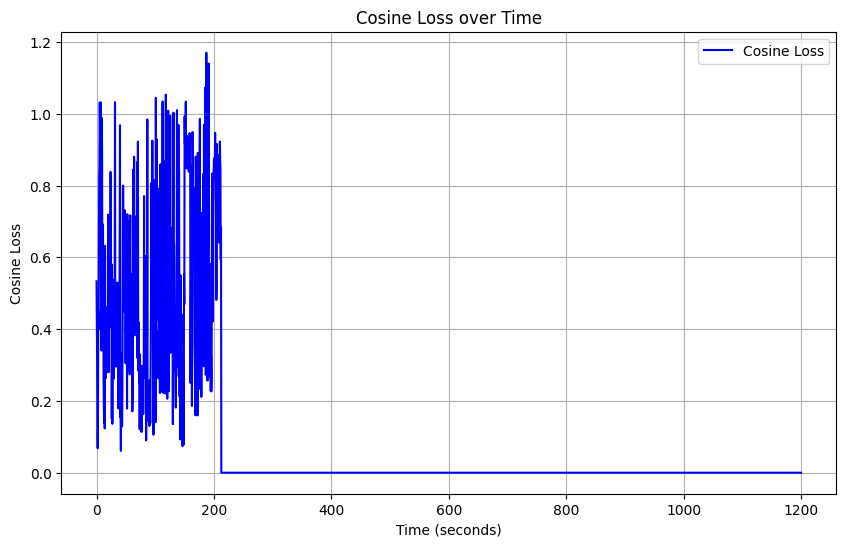

[([27, 44], 'roll the pizza dough and place it on parchment paper'), ([66, 97], 'add tomato puree salt chili flakes oregano and garlic and stir'), ([102, 145], 'pour and spread the sauce on the pizza base and add a layer of grated mozzarella cheese and top with pepperoni'), ([154, 165], 'bake it in the oven'), ([168, 199], 'remove from the oven and slice')]


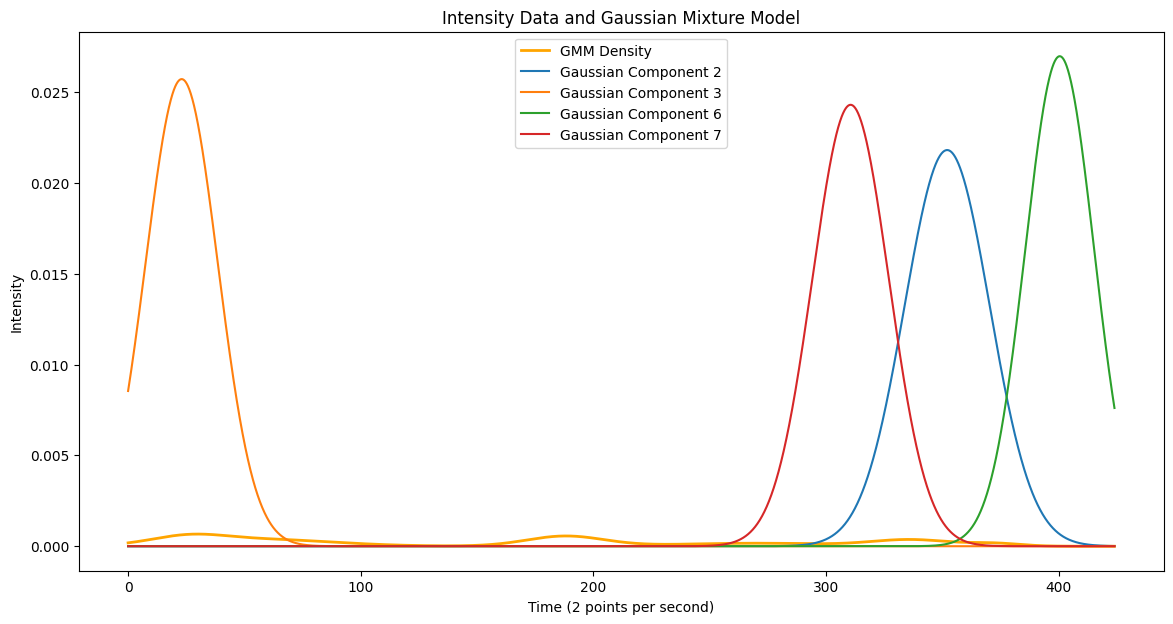

[[176.04174157   0.30109303]
 [ 11.51687782   0.27878499]
 [200.23289772   0.32046107]
 [155.28639932   0.45183756]]
[[[ 3.34777689e+02  1.88734924e+00]
  [ 1.88734924e+00  7.32863786e-02]]

 [[ 2.40813121e+02 -3.47724325e-01]
  [-3.47724325e-01  7.46546402e-02]]

 [[ 2.18841736e+02  2.32427815e+00]
  [ 2.32427815e+00  5.36708474e-02]]

 [[ 2.69662287e+02 -5.79383441e-01]
  [-5.79383441e-01  3.46548902e-03]]]
[0.00018742 0.00018899 0.00019376 0.00019537]


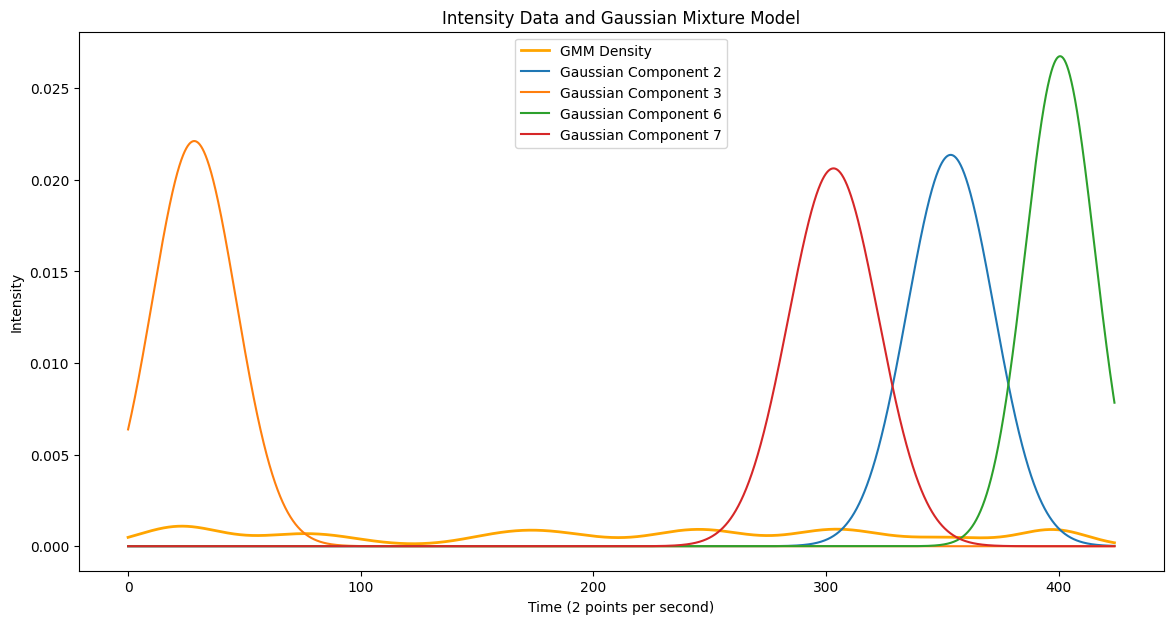

[[176.7946223    0.28459614]
 [ 14.22283238   0.25268923]
 [200.31463168   0.24623158]
 [151.61430382   0.23929242]]
[[[ 3.48654551e+02 -8.43051978e-02]
  [-8.43051978e-02  7.70686502e-02]]

 [[ 3.25270527e+02  1.29940018e+00]
  [ 1.29940018e+00  1.04414595e-01]]

 [[ 2.22399383e+02  4.37864675e-01]
  [ 4.37864675e-01  7.96436763e-02]]

 [[ 3.74021029e+02 -2.34904778e-01]
  [-2.34904778e-01  8.90823324e-02]]]
[0.00048739 0.00049088 0.00050139 0.00050491]


In [ ]:
test_one_example(trained_model, infer_loss_ae, pca="_16")


In [ ]:
input_dim = 16
hidden_dim = 32
output_dim = 16
num_epochs = 15
model = SimpleModel(input_dim, hidden_dim, output_dim).to(device)
cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_model(model, train_loader16, val_loader16, device, cosine_similarity, num_epochs=num_epochs)
# test_one_example(trained_model, infer_loss_ae, pca="_16")
eval_all(trained_model, infer_loss_ae,  pca="_16")

Epoch 1/15, Training Loss: 269410.4602
Epoch 1/15, Validation Loss: 195506.7792
Epoch 2/15, Training Loss: 168635.5971
Epoch 2/15, Validation Loss: 122935.0432
Epoch 3/15, Training Loss: 109817.0404
Epoch 3/15, Validation Loss: 83558.0698
Epoch 4/15, Training Loss: 78039.5366
Epoch 4/15, Validation Loss: 64321.1820
Epoch 5/15, Training Loss: 64367.3745
Epoch 5/15, Validation Loss: 54994.7672
Epoch 6/15, Training Loss: 52634.2494
Epoch 6/15, Validation Loss: 43176.8126
Epoch 7/15, Training Loss: 44778.5835
Epoch 7/15, Validation Loss: 39757.3771
Epoch 8/15, Training Loss: 42044.2347
Epoch 8/15, Validation Loss: 37718.0471
Epoch 9/15, Training Loss: 40091.7280
Epoch 9/15, Validation Loss: 36058.1663
Epoch 10/15, Training Loss: 38417.7906
Epoch 10/15, Validation Loss: 34608.2622
Epoch 11/15, Training Loss: 36917.5477
Epoch 11/15, Validation Loss: 33266.7982
Epoch 12/15, Training Loss: 35543.7568
Epoch 12/15, Validation Loss: 32059.7864
Epoch 13/15, Training Loss: 34305.0899
Epoch 13/15, V

In [ ]:
input_dim = 16
hidden_dim = 64
output_dim = 16
num_epochs = 15
model = SimpleModel(input_dim, hidden_dim, output_dim).to(device)
cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_model(model, train_loader16, val_loader16, device, cosine_similarity, num_epochs=num_epochs)
# test_one_example(trained_model, infer_loss_ae, pca="_16")
eval_all(trained_model, infer_loss_ae,  pca="_16")

Epoch 1/15, Training Loss: 237661.8999
Epoch 1/15, Validation Loss: 127340.0880
Epoch 2/15, Training Loss: 92003.3941
Epoch 2/15, Validation Loss: 56410.7329
Epoch 3/15, Training Loss: 49613.1201
Epoch 3/15, Validation Loss: 40376.5892
Epoch 4/15, Training Loss: 40730.0636
Epoch 4/15, Validation Loss: 36097.5395
Epoch 5/15, Training Loss: 37295.8289
Epoch 5/15, Validation Loss: 33632.5865
Epoch 6/15, Training Loss: 35070.6128
Epoch 6/15, Validation Loss: 31895.6681
Epoch 7/15, Training Loss: 33428.4470
Epoch 7/15, Validation Loss: 30547.0141
Epoch 8/15, Training Loss: 32133.7813
Epoch 8/15, Validation Loss: 29460.6150
Epoch 9/15, Training Loss: 31093.7454
Epoch 9/15, Validation Loss: 28590.7617
Epoch 10/15, Training Loss: 30244.3597
Epoch 10/15, Validation Loss: 27867.1155
Epoch 11/15, Training Loss: 29543.8079
Epoch 11/15, Validation Loss: 27264.5737
Epoch 12/15, Training Loss: 28951.8542
Epoch 12/15, Validation Loss: 26754.7997
Epoch 13/15, Training Loss: 28450.8866
Epoch 13/15, Vali

In [ ]:
input_dim = 64
hidden_dim = 128
output_dim = 64
num_epochs = 15
model = SimpleModel(input_dim, hidden_dim, output_dim).to(device)
cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_model(model, train_loader64, val_loader64, device, cosine_similarity, num_epochs=num_epochs)
# test_one_example(trained_model, infer_loss_ae, pca="_16")
eval_all(trained_model, infer_loss_ae,  pca="_64")

Epoch 1/15, Training Loss: 850623.6384
Epoch 1/15, Validation Loss: 452685.9125
Epoch 2/15, Training Loss: 337514.4077
Epoch 2/15, Validation Loss: 229676.6826
Epoch 3/15, Training Loss: 216490.1332
Epoch 3/15, Validation Loss: 182945.5068
Epoch 4/15, Training Loss: 185072.6254
Epoch 4/15, Validation Loss: 161029.3018
Epoch 5/15, Training Loss: 143742.6163
Epoch 5/15, Validation Loss: 117186.8182
Epoch 6/15, Training Loss: 121256.1843
Epoch 6/15, Validation Loss: 109029.0094
Epoch 7/15, Training Loss: 114141.3250
Epoch 7/15, Validation Loss: 103351.4784
Epoch 8/15, Training Loss: 108431.7290
Epoch 8/15, Validation Loss: 98162.7716
Epoch 9/15, Training Loss: 101463.5333
Epoch 9/15, Validation Loss: 85602.4126
Epoch 10/15, Training Loss: 87041.7841
Epoch 10/15, Validation Loss: 76821.0669
Epoch 11/15, Training Loss: 80426.0305
Epoch 11/15, Validation Loss: 72319.8932
Epoch 12/15, Training Loss: 75973.6005
Epoch 12/15, Validation Loss: 68280.0437
Epoch 13/15, Training Loss: 71766.8095
Epo

In [ ]:
input_dim = 64
hidden_dim = 32
output_dim = 64
num_epochs = 15
model = SimpleModel(input_dim, hidden_dim, output_dim).to(device)
cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_model(model, train_loader64, val_loader64, device, cosine_similarity, num_epochs=num_epochs)
# test_one_example(trained_model, infer_loss_ae, pca="_16")
eval_all(trained_model, infer_loss_ae,  pca="_64")

Epoch 1/15, Training Loss: 1137272.6726
Epoch 1/15, Validation Loss: 902603.3698
Epoch 2/15, Training Loss: 832603.9747
Epoch 2/15, Validation Loss: 674082.5021
Epoch 3/15, Training Loss: 662725.6890
Epoch 3/15, Validation Loss: 575210.6406
Epoch 4/15, Training Loss: 594454.3988
Epoch 4/15, Validation Loss: 538433.7542
Epoch 5/15, Training Loss: 564556.3698
Epoch 5/15, Validation Loss: 514453.3177
Epoch 6/15, Training Loss: 541876.4546
Epoch 6/15, Validation Loss: 497178.2812
Epoch 7/15, Training Loss: 527785.5528
Epoch 7/15, Validation Loss: 485960.5979
Epoch 8/15, Training Loss: 517002.3661
Epoch 8/15, Validation Loss: 477333.6417
Epoch 9/15, Training Loss: 508222.7061
Epoch 9/15, Validation Loss: 468328.1396
Epoch 10/15, Training Loss: 499647.5938
Epoch 10/15, Validation Loss: 462095.0781
Epoch 11/15, Training Loss: 493686.7500
Epoch 11/15, Validation Loss: 456676.9062
Epoch 12/15, Training Loss: 488032.1972
Epoch 12/15, Validation Loss: 451297.1740
Epoch 13/15, Training Loss: 48219

Use covariance filtering

In [ ]:
input_dim = 16
hidden_dim = 32
output_dim = 16
num_epochs = 15
model = SimpleModel(input_dim, hidden_dim, output_dim).to(device)
cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_model(model, train_loader16, val_loader16, device, cosine_similarity, num_epochs=num_epochs)
# test_one_example(trained_model, infer_loss_ae, pca="_16")
eval_all(trained_model, infer_loss_ae,  pca="_16")

Epoch 1/15, Training Loss: 264360.9217
Epoch 1/15, Validation Loss: 190209.4510
Epoch 2/15, Training Loss: 156665.9003
Epoch 2/15, Validation Loss: 104126.4323
Epoch 3/15, Training Loss: 90198.2582
Epoch 3/15, Validation Loss: 69262.4336
Epoch 4/15, Training Loss: 64069.7109
Epoch 4/15, Validation Loss: 51846.7239
Epoch 5/15, Training Loss: 51863.0548
Epoch 5/15, Validation Loss: 45500.4675
Epoch 6/15, Training Loss: 47065.2508
Epoch 6/15, Validation Loss: 42352.1066
Epoch 7/15, Training Loss: 44280.2350
Epoch 7/15, Validation Loss: 40208.8719
Epoch 8/15, Training Loss: 42196.6565
Epoch 8/15, Validation Loss: 38479.6318
Epoch 9/15, Training Loss: 40488.8833
Epoch 9/15, Validation Loss: 37042.1868
Epoch 10/15, Training Loss: 39037.9280
Epoch 10/15, Validation Loss: 35794.3746
Epoch 11/15, Training Loss: 37766.2887
Epoch 11/15, Validation Loss: 34697.3181
Epoch 12/15, Training Loss: 36633.7000
Epoch 12/15, Validation Loss: 33696.0495
Epoch 13/15, Training Loss: 35597.8150
Epoch 13/15, Va

In [ ]:
input_dim = 16
hidden_dim = 32
output_dim = 16
num_epochs = 15
model = ImprovedModel(input_dim, hidden_dim, output_dim).to(device)
cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_model(model, train_loader16, val_loader16, device, cosine_similarity, num_epochs=num_epochs)
# test_one_example(trained_model, infer_loss_ae, pca="_16")
eval_all(trained_model, infer_loss_ae,  pca="_16")

Epoch 1/15, Training Loss: 272086.6734
Epoch 1/15, Validation Loss: 171148.8089
Epoch 2/15, Training Loss: 203941.9282
Epoch 2/15, Validation Loss: 113634.9219
Epoch 3/15, Training Loss: 167895.6414
Epoch 3/15, Validation Loss: 86270.2930
Epoch 4/15, Training Loss: 148844.9356
Epoch 4/15, Validation Loss: 67196.9714
Epoch 5/15, Training Loss: 138201.6265
Epoch 5/15, Validation Loss: 60063.1245
Epoch 6/15, Training Loss: 132729.6031
Epoch 6/15, Validation Loss: 55634.7423
Epoch 7/15, Training Loss: 129429.4952
Epoch 7/15, Validation Loss: 52667.7055
Epoch 8/15, Training Loss: 127648.8983
Epoch 8/15, Validation Loss: 50628.4566
Epoch 9/15, Training Loss: 126097.8871
Epoch 9/15, Validation Loss: 48980.9833
Epoch 10/15, Training Loss: 124583.3417
Epoch 10/15, Validation Loss: 47736.7270
Epoch 11/15, Training Loss: 123923.5915
Epoch 11/15, Validation Loss: 46940.4201
Epoch 12/15, Training Loss: 123005.0928
Epoch 12/15, Validation Loss: 46367.9437
Epoch 13/15, Training Loss: 122041.4262
Epoc

In [ ]:
input_dim = 64
hidden_dim = 32
output_dim = 64
num_epochs = 15
model = SimpleModel(input_dim, hidden_dim, output_dim).to(device)
cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_model(model, train_loader64, val_loader64, device, cosine_similarity, num_epochs=num_epochs)
# test_one_example(trained_model, infer_loss_ae, pca="_16")
eval_all(trained_model, infer_loss_ae,  pca="_64")

Epoch 1/15, Training Loss: 1139653.9494
Epoch 1/15, Validation Loss: 899419.6542
Epoch 2/15, Training Loss: 825484.5312
Epoch 2/15, Validation Loss: 667688.9437
Epoch 3/15, Training Loss: 666775.8542
Epoch 3/15, Validation Loss: 582794.5563
Epoch 4/15, Training Loss: 603834.5164
Epoch 4/15, Validation Loss: 542755.7490
Epoch 5/15, Training Loss: 568124.5045
Epoch 5/15, Validation Loss: 513478.9333
Epoch 6/15, Training Loss: 540029.4844
Epoch 6/15, Validation Loss: 492758.3208
Epoch 7/15, Training Loss: 522967.5082
Epoch 7/15, Validation Loss: 480734.6813
Epoch 8/15, Training Loss: 511793.4792
Epoch 8/15, Validation Loss: 471581.0745
Epoch 9/15, Training Loss: 503779.8237
Epoch 9/15, Validation Loss: 464680.9938
Epoch 10/15, Training Loss: 496310.8385
Epoch 10/15, Validation Loss: 456461.3135
Epoch 11/15, Training Loss: 488311.6890
Epoch 11/15, Validation Loss: 450320.4698
Epoch 12/15, Training Loss: 482289.1347
Epoch 12/15, Validation Loss: 445411.9250
Epoch 13/15, Training Loss: 47684

In [ ]:
input_dim = 64
hidden_dim = 32
output_dim = 64
num_epochs = 15
model = ImprovedModel(input_dim, hidden_dim, output_dim).to(device)
cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_model(model, train_loader64, val_loader64, device, cosine_similarity, num_epochs=num_epochs)
# test_one_example(trained_model, infer_loss_ae, pca="_16")
eval_all(trained_model, infer_loss_ae,  pca="_64")

Epoch 1/15, Training Loss: 1167437.6771
Epoch 1/15, Validation Loss: 868717.2771
Epoch 2/15, Training Loss: 985715.4583
Epoch 2/15, Validation Loss: 688834.3927
Epoch 3/15, Training Loss: 895052.5060
Epoch 3/15, Validation Loss: 603503.5469
Epoch 4/15, Training Loss: 861223.1652
Epoch 4/15, Validation Loss: 571130.6292
Epoch 5/15, Training Loss: 846758.5640
Epoch 5/15, Validation Loss: 552380.8568
Epoch 6/15, Training Loss: 839412.4836
Epoch 6/15, Validation Loss: 537953.6729
Epoch 7/15, Training Loss: 831884.7842
Epoch 7/15, Validation Loss: 527149.9333
Epoch 8/15, Training Loss: 827315.7411
Epoch 8/15, Validation Loss: 519872.2635
Epoch 9/15, Training Loss: 824521.0573
Epoch 9/15, Validation Loss: 514227.6750
Epoch 10/15, Training Loss: 822092.7426
Epoch 10/15, Validation Loss: 510020.3875
Epoch 11/15, Training Loss: 819524.7582
Epoch 11/15, Validation Loss: 507080.8896
Epoch 12/15, Training Loss: 817447.9896
Epoch 12/15, Validation Loss: 504002.8812
Epoch 13/15, Training Loss: 81408

In [ ]:
eval_noise(trained_model, infer_loss_ae,  pca="_16")

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


(0.5530514054190935, 0.4469485945809066, 0.5411496581413016, 2184, 3949, 1765, 2137)


# Simple transformer

In [ ]:
import torch
import torch.nn as nn
import math

class TransformerModel(nn.Module):
    def __init__(self, input_dim, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.input_dim = input_dim
        self.model_type = 'Transformer'
        self.pos_encoder = PositionalEncoding(input_dim, dropout)
        self.layer_norm = nn.LayerNorm(input_dim)  # Layer Normalization
        encoder_layers = nn.TransformerEncoderLayer(d_model=input_dim, nhead=nhead, dim_feedforward=nhid, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=nlayers)
        self.encoder = nn.Linear(input_dim, input_dim)
        self.decoder = nn.Linear(input_dim, input_dim)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.bias.data.zero_()
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.input_dim)
        src = self.pos_encoder(src)
        src = self.layer_norm(src)  # Apply Layer Normalization
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import math

# Assuming TransformerModel is already defined as per previous instructions

def train_transformer_model(model, train_loader, val_loader, device, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for data, mask in train_loader:
            # print(data.shape)
            # print(mask.shape)
            data = data.transpose(0, 1).float().to(device)  # Adjust the shape for Transformer
            mask = mask.to(device)
            src_mask = model.generate_square_subsequent_mask(data.size(0)).to(device)

            optimizer.zero_grad()
            outputs = model(data, src_mask)
            # print(outputs.shape)

            cos_sim = criterion(outputs, data, dim=2)

            losses = 1 - cos_sim
            losses = losses.transpose(0, 1)
            masked_losses = losses * mask

            loss = masked_losses.sum()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for data, mask in val_loader:
                data, mask = data.float().to(device), mask.float().to(device)
                src_mask = model.generate_square_subsequent_mask(data.size(0)).to(device)

                outputs = model(data, src_mask)

                cos_sim = criterion(outputs, data, dim=2)

                losses = 1 - cos_sim
                losses = losses.transpose(0, 1)

                masked_losses = losses * mask.unsqueeze(2)
                loss = masked_losses.sum()

                val_loss += loss.item()

        val_loss /= len(val_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}")

    return model

def infer_loss_tf(model, video_data, device):
    # Ensure the model is in evaluation mode
    model.eval()

    # Convert video data to tensor and pad it
    video_tensor, mask = pad_and_mask_data(video_data, max_length=2400)
    video_tensor = video_tensor.float().to(device).unsqueeze(0)  # Add batch dimension and move to device
    mask = mask.float().to(device)

    # Inference
    with torch.no_grad():
        src_mask = model.generate_square_subsequent_mask(video_tensor.size(0)).to(device)

        reconstructed_data = model(video_tensor, src_mask)

        # Compute the cosine similarity
        cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
        cos_sim = cosine_similarity(reconstructed_data, video_tensor)

        # Compute the cosine loss: 1 - cosine_similarity
        losses = 1 - cos_sim

        # Apply the mask to the losses
        masked_losses = losses.squeeze() * mask

    return masked_losses.cpu().numpy()

In [ ]:
input_dim = 1024  # Feature dimension from your dataset
nhead = 2         # Number of heads in the multi-head attention mechanisms
nhid = 64       # Dimension of the feedforward network
nlayers = 2       # Number of Transformer layers
dropout = 0.1     # Dropout rate

model = TransformerModel(input_dim=input_dim, nhead=nhead, nhid=nhid, nlayers=nlayers, dropout=dropout).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
trained_model = train_transformer_model(model, train_loader, val_loader, device, F.cosine_similarity, optimizer, num_epochs=num_epochs)

Epoch 1/5, Training Loss: 10245.6271
Epoch 1/5, Validation Loss: 364133.6271
Epoch 2/5, Training Loss: 8768.7970
Epoch 2/5, Validation Loss: 326720.6161
Epoch 3/5, Training Loss: 7380.1939
Epoch 3/5, Validation Loss: 273377.1193
Epoch 4/5, Training Loss: 4859.7261
Epoch 4/5, Validation Loss: 223944.8379
Epoch 5/5, Training Loss: 3286.1205
Epoch 5/5, Validation Loss: 199906.0258


In [ ]:
input_dim = 16  # Feature dimension from your dataset
nhead = 4         # Number of heads in the multi-head attention mechanisms
nhid = 32       # Dimension of the feedforward network
nlayers = 4       # Number of Transformer layers
dropout = 0.1     # Dropout rate
num_epochs=15

model = TransformerModel(input_dim=input_dim, nhead=nhead, nhid=nhid, nlayers=nlayers, dropout=dropout).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_transformer_model(model, train_loader16, val_loader16, device, F.cosine_similarity, optimizer, num_epochs=num_epochs)
eval_all(trained_model, infer_loss_tf,  pca="_16")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/15, Training Loss: 11081.9055
Epoch 1/15, Validation Loss: 262560.1551
Epoch 2/15, Training Loss: 4450.5582
Epoch 2/15, Validation Loss: 212430.7859
Epoch 3/15, Training Loss: 3171.5190
Epoch 3/15, Validation Loss: 193325.5216
Epoch 4/15, Training Loss: 2481.6675
Epoch 4/15, Validation Loss: 178954.7533
Epoch 5/15, Training Loss: 2023.5201
Epoch 5/15, Validation Loss: 170443.9022
Epoch 6/15, Training Loss: 1742.5446
Epoch 6/15, Validation Loss: 164059.1349
Epoch 7/15, Training Loss: 1541.5045
Epoch 7/15, Validation Loss: 162905.7013
Epoch 8/15, Training Loss: 1419.0185
Epoch 8/15, Validation Loss: 159959.8762
Epoch 9/15, Training Loss: 1342.0595
Epoch 9/15, Validation Loss: 160820.9507
Epoch 10/15, Training Loss: 1289.6314
Epoch 10/15, Validation Loss: 159298.6953
Epoch 11/15, Training Loss: 1250.3282
Epoch 11/15, Validation Loss: 158045.9715
Epoch 12/15, Training Loss: 1219.1520
Epoch 12/15, Validation Loss: 158321.5671
Epoch 13/15, Training Loss: 1195.2304
Epoch 13/15, Valida

In [ ]:
input_dim = 64  # Feature dimension from your dataset
nhead = 4         # Number of heads in the multi-head attention mechanisms
nhid = 128       # Dimension of the feedforward network
nlayers = 4       # Number of Transformer layers
dropout = 0.1     # Dropout rate
num_epochs=15

model = TransformerModel(input_dim=input_dim, nhead=nhead, nhid=nhid, nlayers=nlayers, dropout=dropout).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_transformer_model(model, train_loader64, val_loader64, device, F.cosine_similarity, optimizer, num_epochs=num_epochs)
eval_all(trained_model, infer_loss_tf,  pca="_64")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/15, Training Loss: 9408.5951
Epoch 1/15, Validation Loss: 248912.9027
Epoch 2/15, Training Loss: 3890.2741
Epoch 2/15, Validation Loss: 201144.7139
Epoch 3/15, Training Loss: 2582.6142
Epoch 3/15, Validation Loss: 182722.0030
Epoch 4/15, Training Loss: 1969.9483
Epoch 4/15, Validation Loss: 174385.4003
Epoch 5/15, Training Loss: 1607.6667
Epoch 5/15, Validation Loss: 165413.1138
Epoch 6/15, Training Loss: 1371.0931
Epoch 6/15, Validation Loss: 163604.8367
Epoch 7/15, Training Loss: 1207.6178
Epoch 7/15, Validation Loss: 159267.1844
Epoch 8/15, Training Loss: 1088.5220
Epoch 8/15, Validation Loss: 156930.4845
Epoch 9/15, Training Loss: 1004.5802
Epoch 9/15, Validation Loss: 157082.6915
Epoch 10/15, Training Loss: 940.0167
Epoch 10/15, Validation Loss: 154769.7769
Epoch 11/15, Training Loss: 889.0775
Epoch 11/15, Validation Loss: 154070.6020
Epoch 12/15, Training Loss: 847.5779
Epoch 12/15, Validation Loss: 152939.6102
Epoch 13/15, Training Loss: 818.2577
Epoch 13/15, Validation 

Use covariance filtering

In [ ]:
input_dim = 16  # Feature dimension from your dataset
nhead = 4         # Number of heads in the multi-head attention mechanisms
nhid = 32       # Dimension of the feedforward network
nlayers = 4       # Number of Transformer layers
dropout = 0.1     # Dropout rate
num_epochs=15

model = TransformerModel(input_dim=input_dim, nhead=nhead, nhid=nhid, nlayers=nlayers, dropout=dropout).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_transformer_model(model, train_loader16, val_loader16, device, F.cosine_similarity, optimizer, num_epochs=num_epochs)
eval_all(trained_model, infer_loss_tf,  pca="_16")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/15, Training Loss: 10097.5845
Epoch 1/15, Validation Loss: 256895.7128
Epoch 2/15, Training Loss: 4286.1528
Epoch 2/15, Validation Loss: 209498.7967
Epoch 3/15, Training Loss: 2965.8691
Epoch 3/15, Validation Loss: 188242.8430
Epoch 4/15, Training Loss: 2331.9461
Epoch 4/15, Validation Loss: 180125.1786
Epoch 5/15, Training Loss: 1981.8540
Epoch 5/15, Validation Loss: 173230.7051
Epoch 6/15, Training Loss: 1770.5093
Epoch 6/15, Validation Loss: 169888.8008
Epoch 7/15, Training Loss: 1638.5965
Epoch 7/15, Validation Loss: 163152.7815
Epoch 8/15, Training Loss: 1530.9077
Epoch 8/15, Validation Loss: 163766.1379
Epoch 9/15, Training Loss: 1402.5731
Epoch 9/15, Validation Loss: 161077.9099
Epoch 10/15, Training Loss: 1295.3696
Epoch 10/15, Validation Loss: 159791.6630
Epoch 11/15, Training Loss: 1237.2525
Epoch 11/15, Validation Loss: 160569.2273
Epoch 12/15, Training Loss: 1202.9733
Epoch 12/15, Validation Loss: 155046.0520
Epoch 13/15, Training Loss: 1178.2175
Epoch 13/15, Valida

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


(0.5340592555077235, 0.4659407444922765, 0.4968346416814383, 2109, 3949, 1840, 1962)


In [ ]:
input_dim = 64  # Feature dimension from your dataset
nhead = 4         # Number of heads in the multi-head attention mechanisms
nhid = 128       # Dimension of the feedforward network
nlayers = 4       # Number of Transformer layers
dropout = 0.1     # Dropout rate
num_epochs=15

model = TransformerModel(input_dim=input_dim, nhead=nhead, nhid=nhid, nlayers=nlayers, dropout=dropout).to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
trained_model = train_transformer_model(model, train_loader64, val_loader64, device, F.cosine_similarity, optimizer, num_epochs=num_epochs)
eval_all(trained_model, infer_loss_tf,  pca="_64")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/15, Training Loss: 9312.0974
Epoch 1/15, Validation Loss: 248594.9768
Epoch 2/15, Training Loss: 3815.6903
Epoch 2/15, Validation Loss: 201076.1678
Epoch 3/15, Training Loss: 2534.4237
Epoch 3/15, Validation Loss: 182490.0508
Epoch 4/15, Training Loss: 1921.1093
Epoch 4/15, Validation Loss: 171026.8684
Epoch 5/15, Training Loss: 1556.0282
Epoch 5/15, Validation Loss: 166800.7961
Epoch 6/15, Training Loss: 1314.8982
Epoch 6/15, Validation Loss: 159556.5027
Epoch 7/15, Training Loss: 1162.1742
Epoch 7/15, Validation Loss: 158762.6141
Epoch 8/15, Training Loss: 1063.1167
Epoch 8/15, Validation Loss: 156578.5027
Epoch 9/15, Training Loss: 990.9612
Epoch 9/15, Validation Loss: 154636.8914
Epoch 10/15, Training Loss: 927.8270
Epoch 10/15, Validation Loss: 152790.4426
Epoch 11/15, Training Loss: 872.0863
Epoch 11/15, Validation Loss: 151871.9298
Epoch 12/15, Training Loss: 834.0372
Epoch 12/15, Validation Loss: 152141.0615
Epoch 13/15, Training Loss: 808.8696
Epoch 13/15, Validation L

# Flow models

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CouplingLayer(nn.Module):
    def __init__(self, input_dim):
        super(CouplingLayer, self).__init__()
        half_dim = input_dim // 2
        self.net = nn.Sequential(
            nn.Linear(half_dim, input_dim),
            nn.BatchNorm1d(input_dim),  # Batch Normalization
            nn.ReLU(),
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
            nn.Linear(input_dim, input_dim)  # This outputs both scale and translation parameters
        )

    def forward(self, x, reverse=False):
        x1, x2 = x.chunk(2, dim=1)

        if not reverse:
            y1 = x1
            s, t = self.net(y1).chunk(2, dim=1)
            y2 = x2 * torch.exp(s) + t
        else:
            # Reverse pass
            # print("nf start x1 shape: ", x1.shape)
            # print("nf start x2 shape: ", x2.shape)
            y1 = x1
            s, t = self.net(y1).chunk(2, dim=1)
            y2 = (x2 - t) * torch.exp(-s)

        return torch.cat([y1, y2], dim=1)

class NormalizingFlow(nn.Module):
    def __init__(self, input_dim, num_layers):
        super(NormalizingFlow, self).__init__()
        self.layers = nn.ModuleList([CouplingLayer(input_dim) for _ in range(num_layers)])

    def forward(self, x, reverse=False):
        # print("Initial NF shape:", x.shape)
        for i, layer in enumerate(reversed(self.layers) if reverse else self.layers):
            x = layer(x, reverse)
            # print(f"After layer {i} (reverse={reverse}) shape: {x.shape}")
        return x


class SequentialFlowModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, sequence_length, num_layers, num_flow_layers):
        super(SequentialFlowModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, input_dim, num_layers, batch_first=True)
        self.flow = NormalizingFlow(input_dim, num_flow_layers)
        self.hidden_dim = hidden_dim
        self.input_dim = input_dim
        self.sequence_length = sequence_length
        self.output_transform = nn.Linear(hidden_dim, input_dim)  # New layer to transform output dimensions

    def forward(self, x, reverse=False):
        # print("Initial shape:", x.shape)

        if not reverse:
            # Forward pass: LSTM followed by Flow
            x, _ = self.lstm(x)
            # print("LSTM output shape:", x.shape)

            batch_size, sequence_length, _ = x.shape
            x = x.contiguous().view(-1, self.input_dim)
            x = self.flow(x)
            # print("Flow output shape:", x.shape)
            x = x.view(batch_size, sequence_length, -1)  # Reshape to original batch and sequence shape
            # print("Final output shape:", x.shape)
            return x
        else:
            # Reverse pass
            # Apply the output transform to match the hidden_dim size
            batch_size, sequence_length, _ = x.shape
            x = x.view(batch_size * sequence_length, self.input_dim)
            # print("After output transform in reverse:", x.shape)


            # Apply the reverse flow model
            x = self.flow(x, reverse=True)
            # print("After reverse flow model:", x.shape)

            # Reshape back to the original shape
            x = x.view(batch_size, sequence_length, self.input_dim)
            # print("Reverse adjusted output shape:", x.shape)

            return x

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

def train_model_flow(model, train_loader, val_loader, device, optimizer, num_epochs=5):
  for epoch in range(num_epochs):
      model.train()
      train_loss = 0.0
      for data, mask in train_loader:
          data, mask = data.float().to(device), mask.float().to(device)
          # print("Input shape:", data.shape)  # Should be [batch_size, 1024] or similar

          optimizer.zero_grad()

          # Forward pass: map embeddings to latent space
          latent_embeddings = model(data)

          # Inverse pass: reconstruct embeddings from latent space
          reconstructed = model(latent_embeddings, reverse=True)
          # print("Reconstructed shape:", reconstructed.shape)
          # print("Data shape:", data.shape)

          cos_sim = F.cosine_similarity(reconstructed, data, dim=2)

          losses = 1 - cos_sim
          # print("Losses shape:", losses.shape)
          masked_losses = losses * mask

          loss = masked_losses.sum()

          loss.backward()
          optimizer.step()

          train_loss += loss.item()

      train_loss /= len(train_loader)
      print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}")

      model.eval()
      val_loss = 0.0
      with torch.no_grad():
          for data, mask in val_loader:
              data, mask = data.float().to(device), mask.float().to(device)

              latent_embeddings = model(data)

              # Inverse pass: reconstruct embeddings from latent space
              reconstructed = model(latent_embeddings, reverse=True)

              cos_sim = F.cosine_similarity(reconstructed, data, dim=2)

              losses = 1 - cos_sim
              masked_losses = losses * mask

              loss = masked_losses.sum()

              val_loss += loss.item()

      val_loss /= len(val_loader)
      print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}")
  return model

def infer_loss_flow(model, video_data, device):
    # Ensure the model is in evaluation mode
    model.eval()

    # Convert video data to tensor and pad it
    video_tensor, mask = pad_and_mask_data(video_data, max_length=2400)
    video_tensor = video_tensor.float().to(device).unsqueeze(0)  # Add batch dimension and move to device
    mask = mask.float().to(device)

    # Inference
    with torch.no_grad():
        reconstructed_data = model(video_tensor)

        # Compute the cosine similarity
        cosine_similarity = nn.CosineSimilarity(dim=2, eps=1e-6)
        cos_sim = F.cosine_similarity(reconstructed_data, video_tensor, dim=2)

        # Compute the cosine loss: 1 - cosine_similarity
        losses = 1 - cos_sim

        # Apply the mask to the losses
        masked_losses = losses.squeeze() * mask

    return masked_losses.cpu().numpy()

In [ ]:
input_dim = 16         # Dimension of each frame embedding
hidden_dim = 32         # Example value, adjust as needed
num_lstm_layers = 2      # Number of LSTM layers
num_flow_layers = 6      # Number of layers in the flow model
sequence_length = 2400  # As per your input data
model = SequentialFlowModel(input_dim, hidden_dim, sequence_length, num_lstm_layers, num_flow_layers)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0, std=0.01)
        m.bias.data.fill_(0)

model.apply(init_weights)
model.to(device)
learning_rate = 0.001  # Example value, adjust based on your needs
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

trained_model = train_model_flow(model, train_loader16, val_loader16, device, optimizer, num_epochs=15)

# test_one_example(trained_model, infer_loss_flow, pca="_16")
eval_all(trained_model, infer_loss_flow,  pca="_16")

Epoch 1/15, Training Loss: 16873.9772
Epoch 1/15, Validation Loss: 12242.7491
Epoch 2/15, Training Loss: 10475.5725
Epoch 2/15, Validation Loss: 7905.7160
Epoch 3/15, Training Loss: 7400.1801
Epoch 3/15, Validation Loss: 6049.2080
Epoch 4/15, Training Loss: 5843.7652
Epoch 4/15, Validation Loss: 4871.3366
Epoch 5/15, Training Loss: 4756.7321
Epoch 5/15, Validation Loss: 3975.8245
Epoch 6/15, Training Loss: 3892.2004
Epoch 6/15, Validation Loss: 3244.8489
Epoch 7/15, Training Loss: 3162.7338
Epoch 7/15, Validation Loss: 2625.3656
Epoch 8/15, Training Loss: 2532.9530
Epoch 8/15, Validation Loss: 2088.6557
Epoch 9/15, Training Loss: 2008.2487
Epoch 9/15, Validation Loss: 1662.4816
Epoch 10/15, Training Loss: 1591.0698
Epoch 10/15, Validation Loss: 1321.2924
Epoch 11/15, Training Loss: 1268.6243
Epoch 11/15, Validation Loss: 1061.7517
Epoch 12/15, Training Loss: 1016.3844
Epoch 12/15, Validation Loss: 848.7665
Epoch 13/15, Training Loss: 811.8414
Epoch 13/15, Validation Loss: 674.5415
Epoc

In [ ]:
test_one_example(trained_model, infer_loss_flow, pca="_16")


NameError: ignored

In [ ]:
input_dim = 16         # Dimension of each frame embedding
hidden_dim = 32         # Example value, adjust as needed
num_lstm_layers = 4      # Number of LSTM layers
num_flow_layers = 10      # Number of layers in the flow model
sequence_length = 2400  # As per your input data
model = SequentialFlowModel(input_dim, hidden_dim, sequence_length, num_lstm_layers, num_flow_layers)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0, std=0.01)
        m.bias.data.fill_(0)

model.apply(init_weights)
model.to(device)
learning_rate = 0.001  # Example value, adjust based on your needs
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

trained_model = train_model_flow(model, train_loader16, val_loader16, device, optimizer, num_epochs=15)

# test_one_example(trained_model, infer_loss_flow, pca="_16")
eval_all(trained_model, infer_loss_flow,  pca="_16")

Epoch 1/15, Training Loss: 18897.0834
Epoch 1/15, Validation Loss: 15516.5050
Epoch 2/15, Training Loss: 14004.6737
Epoch 2/15, Validation Loss: 11149.4064
Epoch 3/15, Training Loss: 10686.3750
Epoch 3/15, Validation Loss: 8972.9482
Epoch 4/15, Training Loss: 8681.0103
Epoch 4/15, Validation Loss: 7155.4558
Epoch 5/15, Training Loss: 6809.1532
Epoch 5/15, Validation Loss: 5717.5094
Epoch 6/15, Training Loss: 5611.8331
Epoch 6/15, Validation Loss: 4814.9211
Epoch 7/15, Training Loss: 4747.9464
Epoch 7/15, Validation Loss: 4081.2158
Epoch 8/15, Training Loss: 4033.1891
Epoch 8/15, Validation Loss: 3518.6573
Epoch 9/15, Training Loss: 3466.5927
Epoch 9/15, Validation Loss: 3023.4017
Epoch 10/15, Training Loss: 3029.8920
Epoch 10/15, Validation Loss: 2679.9302
Epoch 11/15, Training Loss: 2672.7405
Epoch 11/15, Validation Loss: 2398.7833
Epoch 12/15, Training Loss: 2368.7225
Epoch 12/15, Validation Loss: 2078.2763
Epoch 13/15, Training Loss: 2079.0605
Epoch 13/15, Validation Loss: 1802.0754

In [ ]:
input_dim = 64         # Dimension of each frame embedding
hidden_dim = 128         # Example value, adjust as needed
num_lstm_layers = 4      # Number of LSTM layers
num_flow_layers = 10      # Number of layers in the flow model
sequence_length = 2400  # As per your input data
model = SequentialFlowModel(input_dim, hidden_dim, sequence_length, num_lstm_layers, num_flow_layers)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0, std=0.01)
        m.bias.data.fill_(0)

model.apply(init_weights)
model.to(device)
learning_rate = 0.001  # Example value, adjust based on your needs
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

trained_model = train_model_flow(model, train_loader64, val_loader64, device, optimizer, num_epochs=15)

# test_one_example(trained_model, infer_loss_flow, pca="_16")
eval_all(trained_model, infer_loss_flow,  pca="_64")

Epoch 1/15, Training Loss: 15915.3879
Epoch 1/15, Validation Loss: 11000.7042
Epoch 2/15, Training Loss: 10123.0553
Epoch 2/15, Validation Loss: 7626.0666
Epoch 3/15, Training Loss: 6714.7431
Epoch 3/15, Validation Loss: 5091.8350
Epoch 4/15, Training Loss: 4692.2252
Epoch 4/15, Validation Loss: 3766.2789
Epoch 5/15, Training Loss: 3693.7350
Epoch 5/15, Validation Loss: 3082.5555
Epoch 6/15, Training Loss: 3109.2895
Epoch 6/15, Validation Loss: 2650.0060
Epoch 7/15, Training Loss: 2673.4429
Epoch 7/15, Validation Loss: 2284.0206
Epoch 8/15, Training Loss: 2345.2933
Epoch 8/15, Validation Loss: 2031.0630
Epoch 9/15, Training Loss: 2027.6035
Epoch 9/15, Validation Loss: 1752.6789
Epoch 10/15, Training Loss: 1845.5095
Epoch 10/15, Validation Loss: 1589.1187
Epoch 11/15, Training Loss: 1683.7692
Epoch 11/15, Validation Loss: 1526.3631
Epoch 12/15, Training Loss: 1530.0250
Epoch 12/15, Validation Loss: 1364.0520
Epoch 13/15, Training Loss: 1407.7604
Epoch 13/15, Validation Loss: 1302.7406
E

Use cf

In [ ]:
input_dim = 16         # Dimension of each frame embedding
hidden_dim = 32         # Example value, adjust as needed
num_lstm_layers = 4      # Number of LSTM layers
num_flow_layers = 10      # Number of layers in the flow model
sequence_length = 2400  # As per your input data
model = SequentialFlowModel(input_dim, hidden_dim, sequence_length, num_lstm_layers, num_flow_layers)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0, std=0.01)
        m.bias.data.fill_(0)

model.apply(init_weights)
model.to(device)
learning_rate = 0.001  # Example value, adjust based on your needs
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

trained_model = train_model_flow(model, train_loader16, val_loader16, device, optimizer, num_epochs=15)

# test_one_example(trained_model, infer_loss_flow, pca="_16")
eval_all(trained_model, infer_loss_flow,  pca="_16")

Epoch 1/15, Training Loss: 16843.1592
Epoch 1/15, Validation Loss: 13751.1496
Epoch 2/15, Training Loss: 12681.8831
Epoch 2/15, Validation Loss: 10254.1025
Epoch 3/15, Training Loss: 9859.0373
Epoch 3/15, Validation Loss: 8241.8535
Epoch 4/15, Training Loss: 7864.4549
Epoch 4/15, Validation Loss: 6442.6541
Epoch 5/15, Training Loss: 6197.3056
Epoch 5/15, Validation Loss: 5330.8490
Epoch 6/15, Training Loss: 5263.1137
Epoch 6/15, Validation Loss: 4575.5752
Epoch 7/15, Training Loss: 4569.6193
Epoch 7/15, Validation Loss: 3990.3375
Epoch 8/15, Training Loss: 3967.1917
Epoch 8/15, Validation Loss: 3518.5292
Epoch 9/15, Training Loss: 3380.6653
Epoch 9/15, Validation Loss: 2910.2407
Epoch 10/15, Training Loss: 2851.7503
Epoch 10/15, Validation Loss: 2521.7094
Epoch 11/15, Training Loss: 2410.2264
Epoch 11/15, Validation Loss: 2076.2337
Epoch 12/15, Training Loss: 2028.8468
Epoch 12/15, Validation Loss: 1774.5984
Epoch 13/15, Training Loss: 1742.4100
Epoch 13/15, Validation Loss: 1633.3953


In [ ]:
input_dim = 64         # Dimension of each frame embedding
hidden_dim = 128         # Example value, adjust as needed
num_lstm_layers = 4      # Number of LSTM layers
num_flow_layers = 10      # Number of layers in the flow model
sequence_length = 2400  # As per your input data
model = SequentialFlowModel(input_dim, hidden_dim, sequence_length, num_lstm_layers, num_flow_layers)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal_(m.weight, mean=0, std=0.01)
        m.bias.data.fill_(0)

model.apply(init_weights)
model.to(device)
learning_rate = 0.001  # Example value, adjust based on your needs
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

trained_model = train_model_flow(model, train_loader64, val_loader64, device, optimizer, num_epochs=15)

# test_one_example(trained_model, infer_loss_flow, pca="_16")
eval_all(trained_model, infer_loss_flow,  pca="_64")

Epoch 1/15, Training Loss: 15198.0862
Epoch 1/15, Validation Loss: 10676.0450
Epoch 2/15, Training Loss: 9768.6019
Epoch 2/15, Validation Loss: 7427.1941
Epoch 3/15, Training Loss: 6693.1052
Epoch 3/15, Validation Loss: 5161.3771
Epoch 4/15, Training Loss: 4687.1619
Epoch 4/15, Validation Loss: 3717.1224
Epoch 5/15, Training Loss: 3613.9752
Epoch 5/15, Validation Loss: 3047.5079
Epoch 6/15, Training Loss: 2998.9310
Epoch 6/15, Validation Loss: 2556.7193
Epoch 7/15, Training Loss: 2540.5565
Epoch 7/15, Validation Loss: 2208.7060
Epoch 8/15, Training Loss: 2169.8811
Epoch 8/15, Validation Loss: 1854.1130
Epoch 9/15, Training Loss: 1944.5284
Epoch 9/15, Validation Loss: 1684.9451
Epoch 10/15, Training Loss: nan
Epoch 10/15, Validation Loss: nan
Epoch 11/15, Training Loss: nan
Epoch 11/15, Validation Loss: nan
Epoch 12/15, Training Loss: nan
Epoch 12/15, Validation Loss: nan
Epoch 13/15, Training Loss: nan
Epoch 13/15, Validation Loss: nan
Epoch 14/15, Training Loss: nan
Epoch 14/15, Valid

ValueError: ignored